In [1]:
# Import the ``ansys.dpf.core`` module
import ansys.dpf.core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops

# Define the result file path
result_file_path_1 = examples.download_piston_rod()

# Create a model from the result file
model_1 = dpf.Model(data_sources=result_file_path_1)

In [2]:
# Get the stress operator for component XX
stress_XX_op = ops.result.stress_X(data_sources=model_1)

# The default behavior of the operator is to return data as *'ElementalNodal'*
print(stress_XX_op.eval())

DPF stress(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  3} with Nodal location, 1 components and 33337 entities.



In [3]:
# Define the desired location as an input of the stress operator
stress_XX_op.inputs.requested_location(dpf.locations.nodal)

# Get the output
stress_XX_fc = stress_XX_op.eval()

In [4]:
# Extract the mesh
meshed_region_1 = model_1.metadata.meshed_region

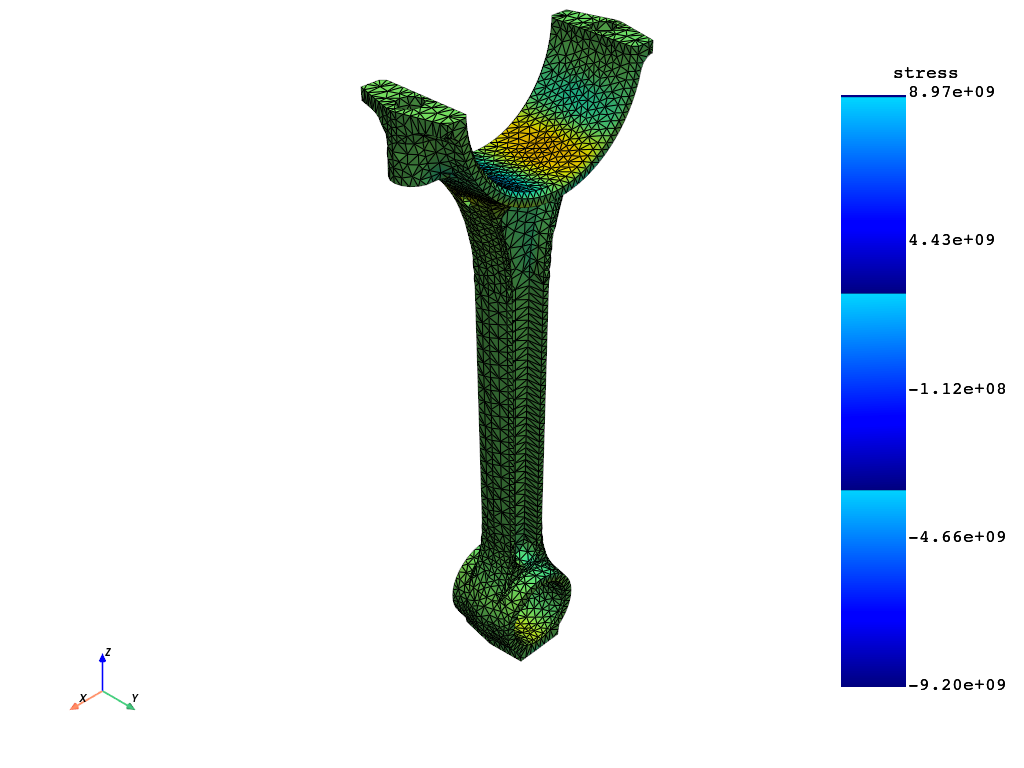

(None, <pyvista.plotting.plotter.Plotter at 0x205260a5cd0>)

In [5]:
# Get a single field
stress_XX = stress_XX_fc[0]

# Plot the contour on the mesh
stress_XX.plot(meshed_region=meshed_region_1)

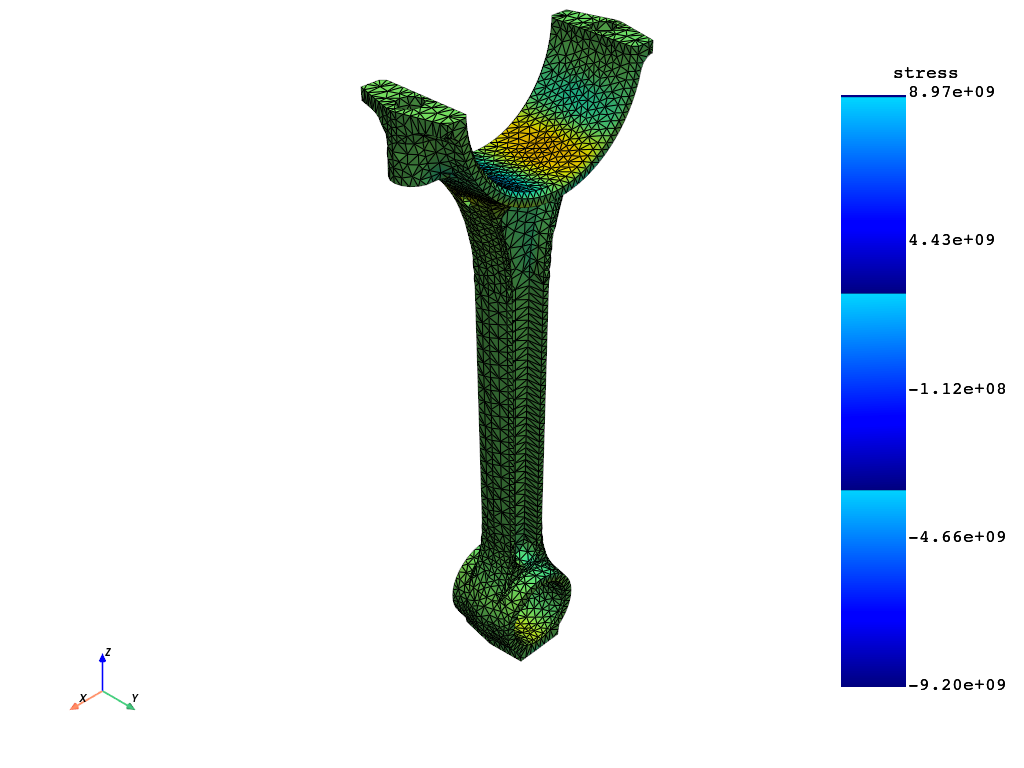

(None, <pyvista.plotting.plotter.Plotter at 0x20518aeb710>)

In [6]:
# Plot the mesh with the stress field contour
meshed_region_1.plot(field_or_fields_container=stress_XX)

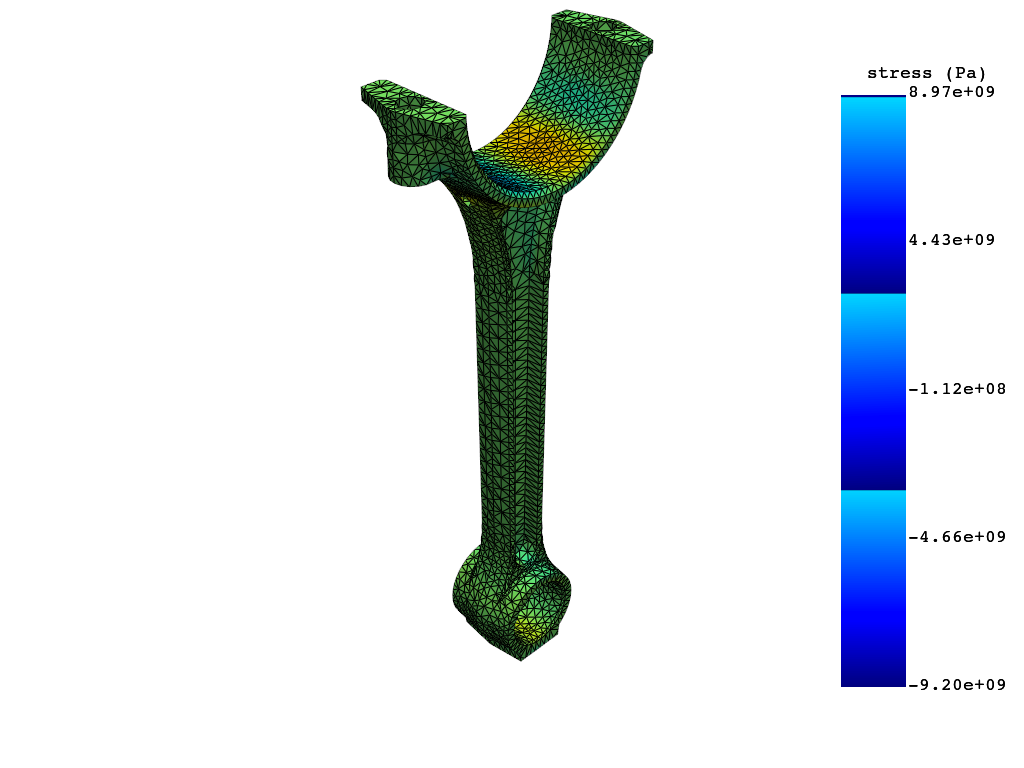

(None, <pyvista.plotting.plotter.Plotter at 0x20526041450>)

In [7]:
# Create a DpfPlotter instance
plotter_1 = dpf.plotter.DpfPlotter()

# Add the field to the scene, here with an explicitly associated mesh
plotter_1.add_field(field=stress_XX, meshed_region=meshed_region_1)

# Display the scene
plotter_1.show_figure()

In [8]:
# Split the field based on material property
fields = (
    ops.mesh.split_fields(
        field_or_fields_container=stress_XX_fc,
        meshes=ops.mesh.split_mesh(mesh=meshed_region_1, property="mat"),
    )
).eval()

# Show the result
print(fields)

DPF  Fields Container
  with 2 field(s)
  defined on labels: body mat time 

  with:
  - field 0 {mat:  1, body:  1, time:  3} with Nodal location, 1 components and 17281 entities.
  - field 1 {mat:  2, body:  2, time:  3} with Nodal location, 1 components and 17610 entities.



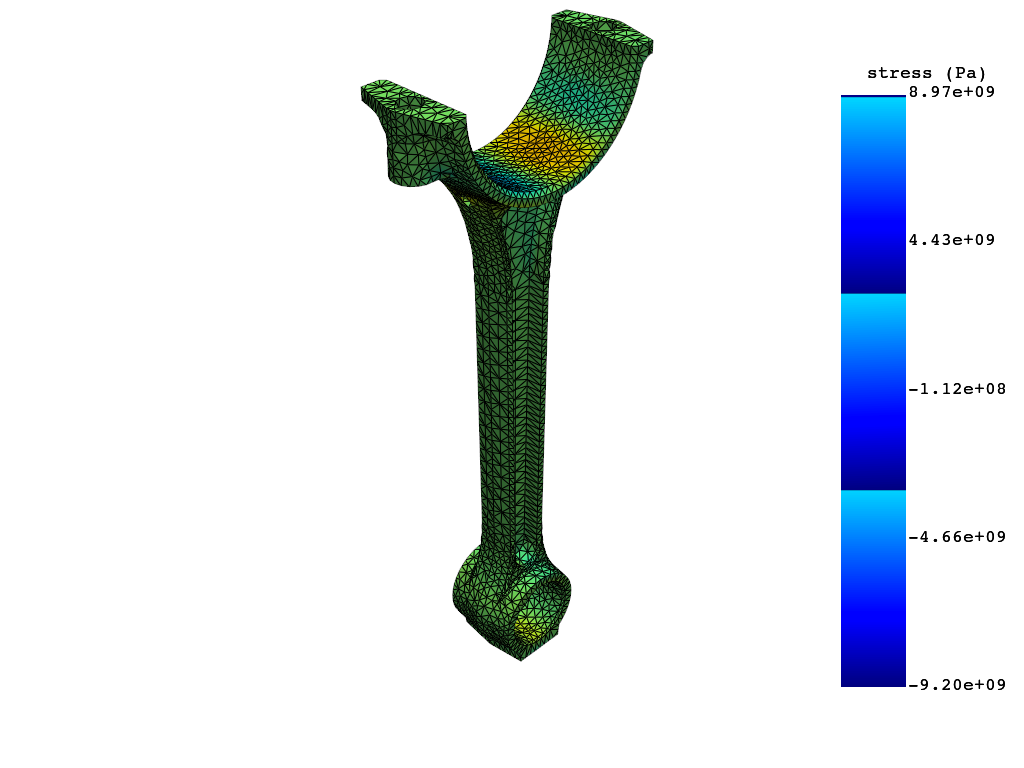

(None, <pyvista.plotting.plotter.Plotter at 0x2052b9e56d0>)

In [9]:
# Plot the contour for all fields in the collection
fields.plot()

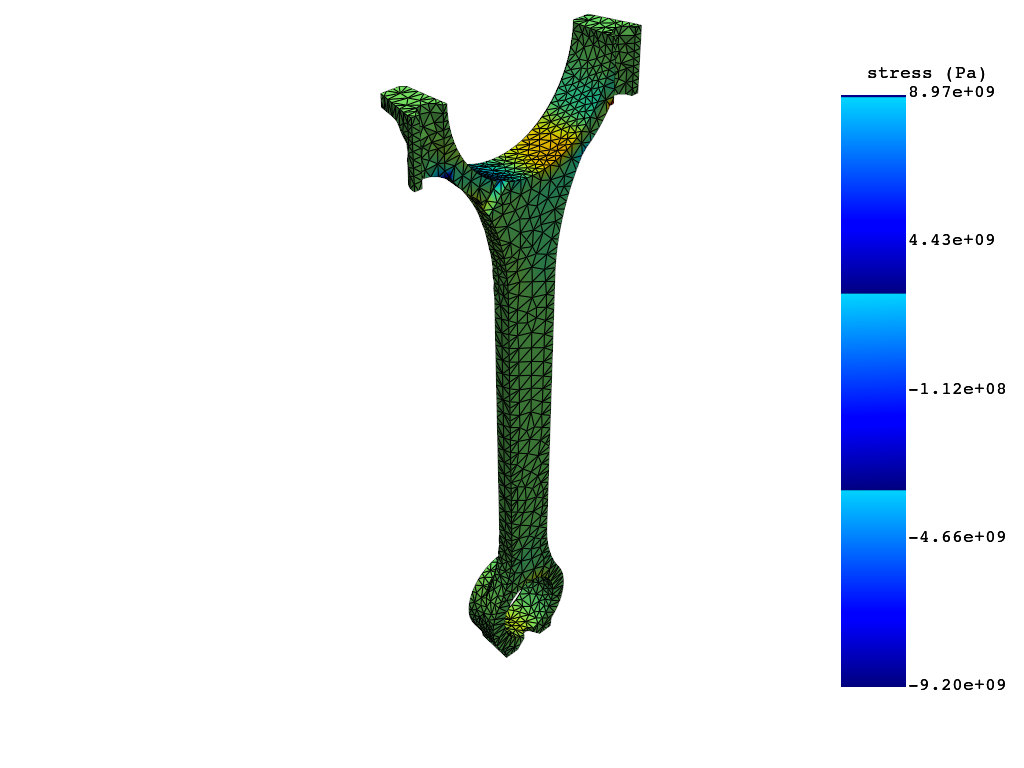

(None, <pyvista.plotting.plotter.Plotter at 0x2052b4a2290>)

In [10]:
# Plot the contour for ``mat`` 1 only
fields.plot(label_space={"mat":1})

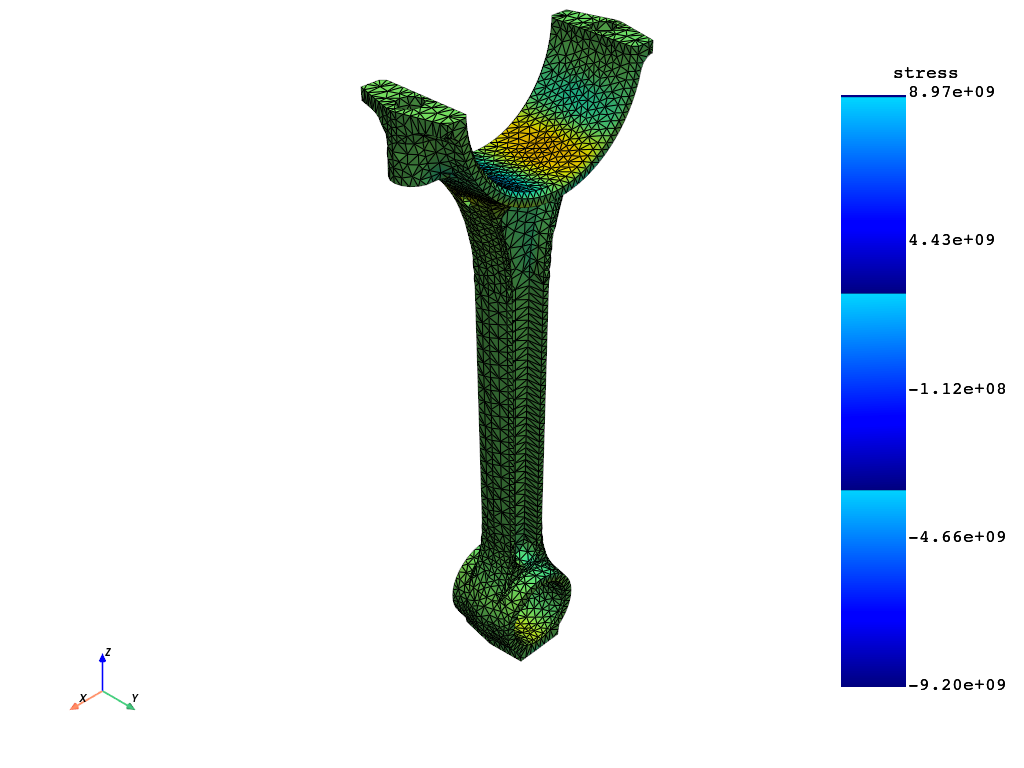

(None, <pyvista.plotting.plotter.Plotter at 0x2052bc66110>)

In [11]:
# Plot the mesh with the stress field contours
meshed_region_1.plot(field_or_fields_container=fields)

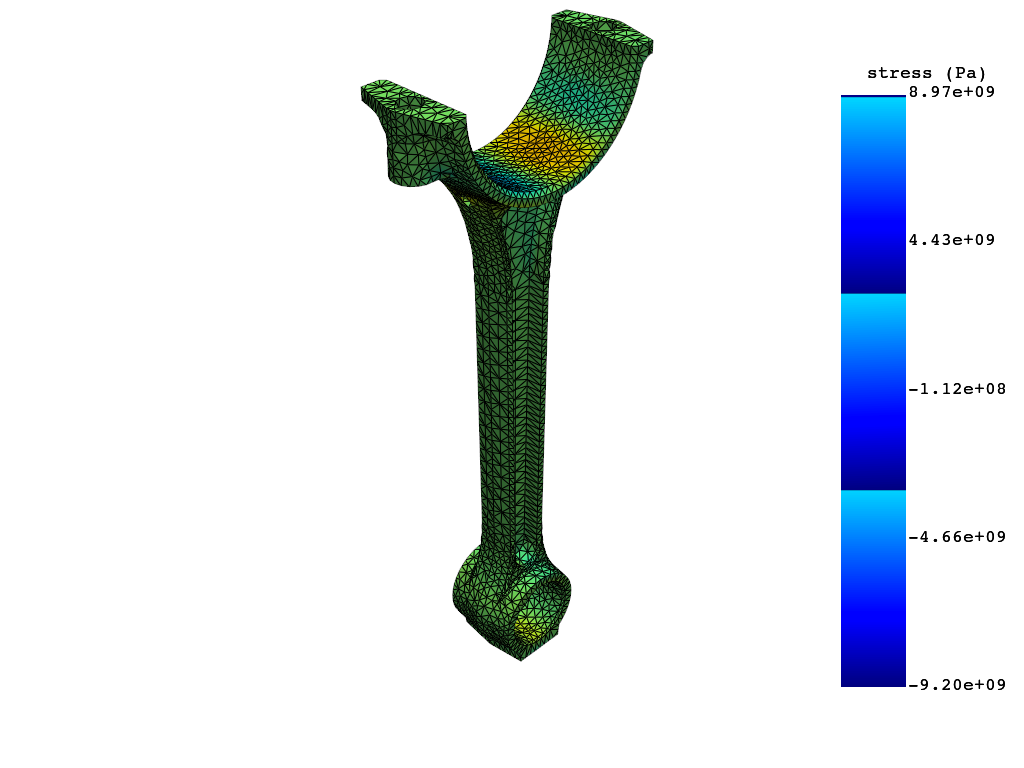

(None, <pyvista.plotting.plotter.Plotter at 0x2052bca7fd0>)

In [12]:
# Create a DpfPlotter instance
plotter_1 = dpf.plotter.DpfPlotter()

# Add each field to the scene
plotter_1.add_field(field=fields[0])
plotter_1.add_field(field=fields[1])

# Display the scene
plotter_1.show_figure()

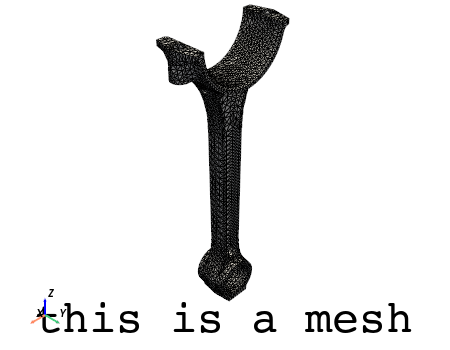

(None, <pyvista.plotting.plotter.Plotter at 0x2052b44b410>)

In [13]:
model_1.plot(title="Mesh",
             text="this is a mesh",  # Adds the given text at the bottom of the plot
             off_screen=True,
             screenshot="mesh_plot_1.png",  # Save a screenshot to file with the given name
             window_size=[450,350])
# Notes:
# - To save a screenshot to file, use "screenshot=figure_name.png" ( as well as "notebook=False" if on a Jupyter notebook).
# - The "off_screen" keyword only works when "notebook=False". If "off_screen=True" the plot is not displayed when running the code.